In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("blogs.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [20]:
# Text Preprocessing
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

In [21]:
def preprocess_text(text):
    text=text.lower()  # lowercase
    text=text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens=text.split()  # tokenize
    tokens=[stemmer.stem(word) for word in tokens if word not in stop_words]  # remove stopwords and stem
    return " ".join(tokens)

In [22]:
df['clean_text']=df['Data'].apply(preprocess_text)

In [23]:
# Feature Extraction
vectorizer=TfidfVectorizer(max_features=3000)
X=vectorizer.fit_transform(df['clean_text'])
y=df['Labels']

In [24]:
# Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Naive Bayes Classifier
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [26]:
# Evaluation
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.44      0.67      0.53        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.72      0.82      0.77        22
comp.sys.ibm.pc.hardware       0.90      0.72      0.80        25
   comp.sys.mac.hardware       0.77      0.81      0.79        21
          comp.windows.x       0.84      0.84      0.84        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.79      0.94      0.86        16
      rec.sport.baseball       0.75      1.00      0.86        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.59      0.62      0.61        16
                 sci.med       0.88      0.88      

In [27]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    polarity=TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [28]:
df['Sentiment']=df['Data'].apply(get_sentiment)

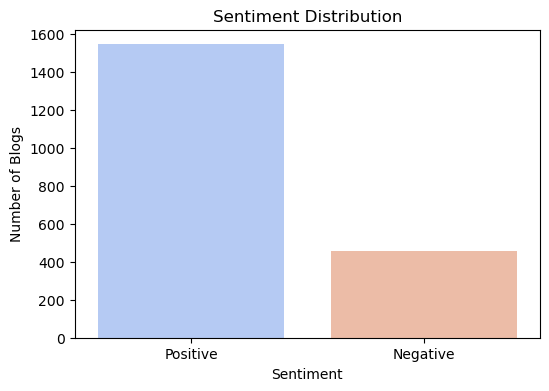

In [29]:
# Sentiment Distribution
sentiment_counts=df['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values,palette='coolwarm')
plt.title("Sentiment Distribution")
plt.ylabel("Number of Blogs")
plt.xlabel("Sentiment")
plt.show()

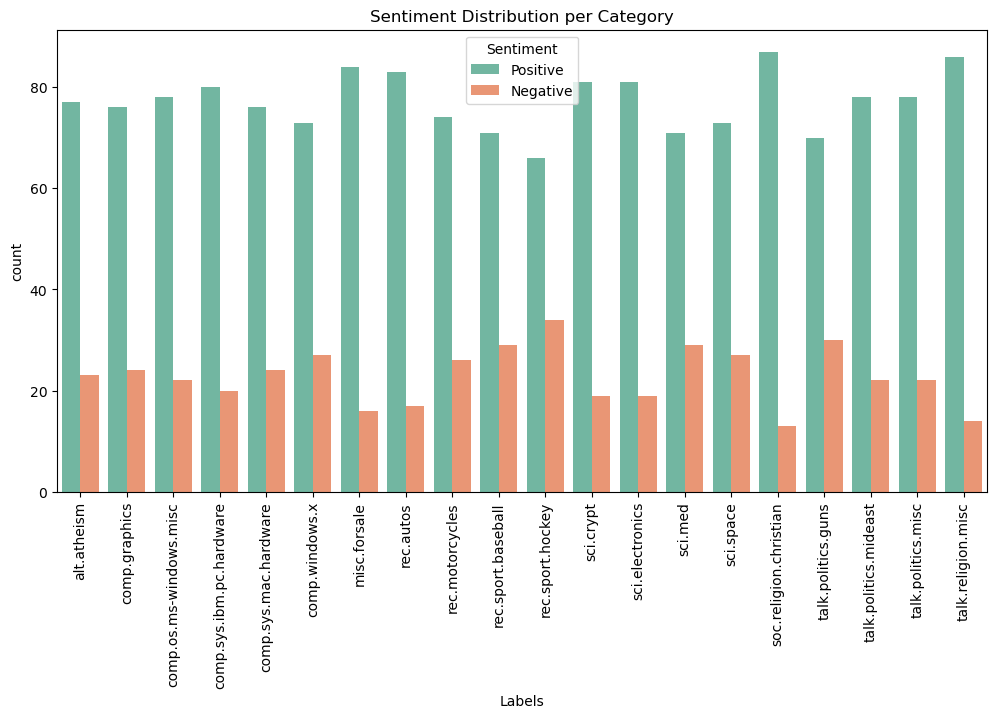

In [30]:
# Sentiment by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='Labels',hue='Sentiment',palette='Set2')
plt.title("Sentiment Distribution per Category")
plt.xticks(rotation=90)
plt.show()